In [1]:
import os
import csv
import pandas as pd
import collections as ct
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
from scipy.stats import linregress
import gmaps 
from config import gkey 





In [2]:
gmaps.configure(api_key=gkey)


In [3]:
chum_path = 'C:/Users/bassa/projects/wildfire/resources/'
chum_csv_file = 'fire_clean.csv'
chum_csv_filepath = os.path.join(chum_path, chum_csv_file)
print(chum_csv_filepath)

C:/Users/bassa/projects/wildfire/resources/fire_clean.csv


In [4]:
dirty_fire = pd.read_csv(chum_csv_filepath)

In [5]:
clean_df = pd.read_csv(chum_csv_filepath, lineterminator='\n')

In [6]:
clean_df.head()

,FOD_ID,SOURCE_SYSTEM,SOURCE_REPORTING_UNIT_NAME,FIRE_YEAR,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE
0,1,FS-FIRESTAT,Plumas National Forest,2005,Miscellaneous,0.10,A,40.036944,-121.005833,CA
1,2,FS-FIRESTAT,Eldorado National Forest,2004,Lightning,0.25,A,38.933056,-120.404444,CA
2,3,FS-FIRESTAT,Eldorado National Forest,2004,Debris Burning,0.10,A,38.984167,-120.735556,CA
3,4,FS-FIRESTAT,Eldorado National Forest,2004,Lightning,0.10,A,38.559167,-119.913333,CA
4,5,FS-FIRESTAT,Eldorado National Forest,2004,Lightning,0.10,A,38.559167,-119.933056,CA


In [7]:
states_number = clean_df['STATE'].nunique()

states_number 

52

In [8]:
lat_mode = clean_df["LATITUDE"].mode()

lat_mode 


0    47.8666
dtype: float64

In [9]:
long_mode = clean_df["LONGITUDE"].mode()

long_mode

0   -110.4518
dtype: float64

In [10]:
state_mode = clean_df["STATE"].mode()

state_mode

0    CA
dtype: object

In [11]:
source_mode = clean_df["SOURCE_REPORTING_UNIT_NAME"].mode()

source_mode

0    Georgia Forestry Commission
dtype: object

In [12]:
class_mode = clean_df["FIRE_SIZE_CLASS"].mode()

class_mode

0    B
dtype: object

In [13]:
class_max = clean_df["FIRE_SIZE"].max()

class_max

606945.0

In [14]:
locations = clean_df[["LATITUDE", "LONGITUDE"]]

locations

,LATITUDE,LONGITUDE
0,40.036944,-121.005833
1,38.933056,-120.404444
2,38.984167,-120.735556
3,38.559167,-119.913333
4,38.559167,-119.933056
...,...,...
1880460,40.481637,-122.389375
1880461,37.617619,-120.938570
1880462,37.617619,-120.938570
1880463,37.672235,-120.898356


In [15]:
clean_df["STATE"].mode()

0    CA
dtype: object

In [16]:
size_mean = clean_df["FIRE_SIZE"].mean

clean_df

,FOD_ID,SOURCE_SYSTEM,SOURCE_REPORTING_UNIT_NAME,FIRE_YEAR,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE
0,1,FS-FIRESTAT,Plumas National Forest,2005,Miscellaneous,0.10,A,40.036944,-121.005833,CA
1,2,FS-FIRESTAT,Eldorado National Forest,2004,Lightning,0.25,A,38.933056,-120.404444,CA
2,3,FS-FIRESTAT,Eldorado National Forest,2004,Debris Burning,0.10,A,38.984167,-120.735556,CA
3,4,FS-FIRESTAT,Eldorado National Forest,2004,Lightning,0.10,A,38.559167,-119.913333,CA
4,5,FS-FIRESTAT,Eldorado National Forest,2004,Lightning,0.10,A,38.559167,-119.933056,CA
...,...,...,...,...,...,...,...,...,...,...
1880460,300348363,ST-CACDF,Shasta-Trinity Unit,2015,Missing/Undefined,0.01,A,40.481637,-122.389375,CA
1880461,300348373,ST-CACDF,Tuolumne-Calaveras Unit,2015,Miscellaneous,0.20,A,37.617619,-120.938570,CA
1880462,300348375,ST-CACDF,Tuolumne-Calaveras Unit,2015,Missing/Undefined,0.10,A,37.617619,-120.938570,CA
1880463,300348377,ST-CACDF,Tuolumne-Calaveras Unit,2015,Missing/Undefined,2.00,B,37.672235,-120.898356,CA


In [17]:
most_common_source = clean_df["STAT_CAUSE_DESCR"].mode()

most_common_source 

0    Debris Burning
dtype: object

In [18]:
cause_and_size = clean_df[["STATE","STAT_CAUSE_DESCR"]]

cause_and_size = cause_and_size.set_index("STATE")

cause_and_size.head()


,STAT_CAUSE_DESCR
STATE,
CA,Miscellaneous
CA,Lightning
CA,Debris Burning
CA,Lightning
CA,Lightning


In [20]:
x_axis = np.arange(len(clean_df))
tick_locations = [value+0.4 for value in x_axis]

In [21]:
causes.nunique()

13

In [112]:
causes = clean_df['STAT_CAUSE_DESCR']

In [145]:
causes_df = [("Debris Burning") ,
             ("Miscellaneous") ,
             ("Arson" ) ,
             ("Lightning") ,
             ("Missing/Undefined") ,
             ("Equipment Use"),
         ("Campfire"),
         ("Children"),
         ("Smoking")]
 
 

#pd.Series.astype[float("STAT_CAUSE_DESCR")] 


new_cause = pd.DataFrame(causes_df, columns = ['STAT_CAUS_DESCR'], index=[1, 2, 3 , 4 , 5 , 6, 7, 8, 9])

new_cause





,STAT_CAUS_DESCR
1,Debris Burning
2,Miscellaneous
3,Arson
4,Lightning
5,Missing/Undefined
6,Equipment Use
7,Campfire
8,Children
9,Smoking


In [135]:
colors = ["yellow","green","lightblue","orange","red","purple","pink","yellowgreen","lightskyblue"]

ValueError: could not convert string to float: 'Debris Burning'

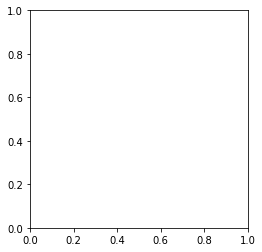

In [148]:
plt.pie(new_cause,labels=['Debris Burning', 'Miscellaneous', 'Arson','Lightning', 'Missing/Undefined', 'Equipment Use', 'Campfire', 'Children', 'Smoking'], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140, radius=3)
#plt.figure(figsize=(1,3))

#plt.axis("equal")



#plt.astype(float)



plt.title("Top Causes of Fire")
plt.savefig("../Pictures/PyPies.png")

In [ ]:
x_axis = clean_df.iloc[:,9]
y_axis = clean_df.iloc[:,4]

In [150]:
clean_df.head()


,FOD_ID,SOURCE_SYSTEM,SOURCE_REPORTING_UNIT_NAME,FIRE_YEAR,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE
0,1,FS-FIRESTAT,Plumas National Forest,2005,Miscellaneous,0.10,A,40.036944,-121.005833,CA
1,2,FS-FIRESTAT,Eldorado National Forest,2004,Lightning,0.25,A,38.933056,-120.404444,CA
2,3,FS-FIRESTAT,Eldorado National Forest,2004,Debris Burning,0.10,A,38.984167,-120.735556,CA
3,4,FS-FIRESTAT,Eldorado National Forest,2004,Lightning,0.10,A,38.559167,-119.913333,CA
4,5,FS-FIRESTAT,Eldorado National Forest,2004,Lightning,0.10,A,38.559167,-119.933056,CA


In [151]:
narrowed_firenew_df = clean_df.loc[(clean_df["FIRE_SIZE"] > 1000) \
                                    & (clean_df["FIRE_YEAR"] > 2010)].dropna()
narrowed_firenew_df

,FOD_ID,SOURCE_SYSTEM,SOURCE_REPORTING_UNIT_NAME,FIRE_YEAR,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE
1454148,20020244,FS-FIRESTAT,Mark Twain National Forest,2011,Arson,3521.0,F,36.917222,-91.275833,MO
1454179,20020275,FS-FIRESTAT,Mark Twain National Forest,2011,Arson,4761.0,F,37.472222,-91.336944,MO
1454246,20020362,FS-FIRESTAT,Superior National Forest,2011,Lightning,92682.0,G,47.905556,-91.524167,MN
1454385,20020510,FS-FIRESTAT,Boise National Forest,2011,Lightning,4853.0,F,44.211667,-115.353333,ID
1454481,20020606,FS-FIRESTAT,Bridger-Teton National Forest,2011,Lightning,9670.0,G,43.562778,-110.395278,WY
...,...,...,...,...,...,...,...,...,...,...
1877889,300335348,ST-CACDF,Mendocino Unit,2014,Miscellaneous,12535.0,G,39.833208,-123.631965,CA
1878013,300336101,ST-CACDF,Santa Barbara County Fire Department,2015,Missing/Undefined,1800.0,F,34.449685,-119.769826,CA
1878988,300340902,ST-CACDF,CDF - San Benito-Monterey Unit,2015,Missing/Undefined,1100.0,F,36.391049,-121.595123,CA
1879336,300342585,ST-CACDF,Santa Clara Unit,2013,Miscellaneous,3100.0,F,37.904877,-121.874159,CA


In [152]:
average_size_lightning = lightning_fire_size["FIRE_SIZE"].mean()

NameError: name 'lightning_fire_size' is not defined

In [153]:
narrowed_fire_df = clean_df.loc[(clean_df["FIRE_SIZE"] > 1000) \
                                    & (clean_df["FIRE_YEAR"] < 2010)].dropna()
narrowed_fire_df

,FOD_ID,SOURCE_SYSTEM,SOURCE_REPORTING_UNIT_NAME,FIRE_YEAR,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE
16,17,FS-FIRESTAT,Eldorado National Forest,2004,Equipment Use,16823.0,G,38.523333,-120.211667,CA
17,18,FS-FIRESTAT,Eldorado National Forest,2004,Equipment Use,7700.0,G,38.780000,-120.260000,CA
188,192,FS-FIRESTAT,Tonto National Forest,2005,Lightning,16100.0,G,33.723333,-111.275000,AZ
548,556,FS-FIRESTAT,Sequoia National Forest,2005,Miscellaneous,1149.0,F,35.688056,-118.438333,CA
582,590,FS-FIRESTAT,Tonto National Forest,2005,Lightning,1300.0,F,33.933611,-111.379722,AZ
...,...,...,...,...,...,...,...,...,...,...
1876488,300329140,ST-CACDF,Santa Clara Unit,2009,Powerline,2163.0,F,37.633160,-121.502500,CA
1876976,300331400,ST-CACDF,Santa Clara Unit,2008,Missing/Undefined,4270.0,F,37.128611,-121.945556,CA
1877056,300331752,ST-CACDF,CDF - San Bernardino Unit,2009,Missing/Undefined,1159.0,F,34.054640,-116.985779,CA
1878523,300338871,ST-CACDF,Butte Unit,2008,Arson,23344.0,G,39.762464,-121.736696,CA


In [154]:
narrowed_fire_df["STAT_CAUSE_DESCR"].mode()

0    Lightning
dtype: object

In [155]:
narrowed_fire_df["FIRE_SIZE"].mean()

10374.20198377068

In [156]:
narrowed_firenew_df["FIRE_SIZE"].mean()

12331.16759231906

In [ ]:
#plt.bar(clean_df["FIRE_YEAR"],clean_df["FIRE_SIZE"])
#plt.xlabel("Fire Year")
#plt.ylabel("Significant Fires since 2010")
#plt.show()